* **Recuurent Neural Network** or **RNN** for short is a depp learning model introduced for solving real time, sequential problems like weather forecasting, stock marketing.

* As we know deep learning is "a play with datasets". Datasets are the characteristic expression of variables. There are two types of variables:
1. dependent variable
2. independent variable.

* In this notebook, we're going to see a problem based on the sequential data, which means data points with dependencies. Just think about a simple control system which has a feedback
* Think of a non-causal systems! let the system be
> 𝑦(𝑡) = 𝑥2(𝑡) + 𝑥(𝑡 − 3)

here the variabley(t) is dependent on present x(t) value as well as on x(t-3).
* Each and every datapoint in sequencial data represents an observation of at certain point in time.
* As the data is sequential, traditional neural network can't handle such types of data.

Let's take a look of a sequential problem


**JACKIE CHAN'S PREDICTION of an Amateur's Stunt **

I would like you to see this video in this link: [https://youtu.be/1EU9NNomTGM](http://)

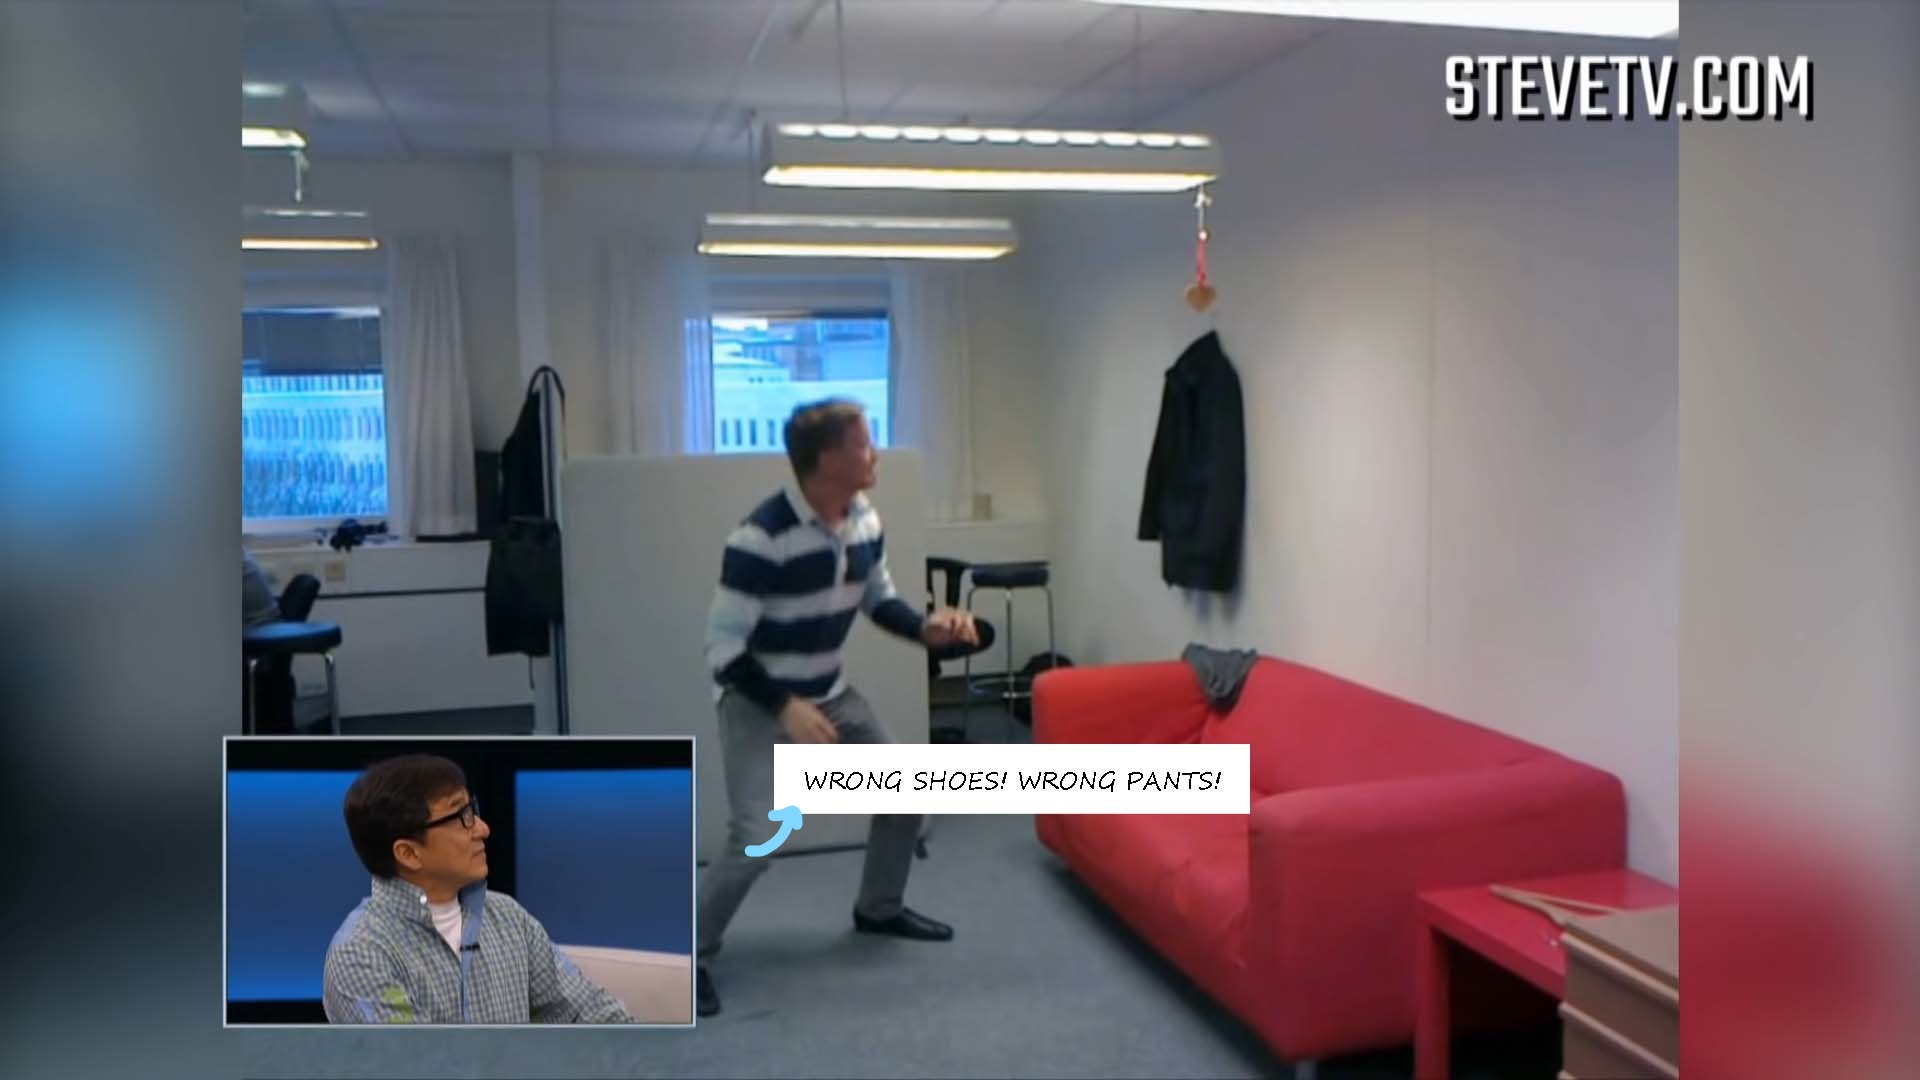

As we can see, his prediction is accurate, only based on the inital state of the stunt person's . The same way this RNN works. The only thing is, all the features are parameterised.

I hope you got what is RNN mean. Let's dive into tensorflow framework.

****Recurrent Neural Networks (RNN) with Keras ****

 *  a RNN layer uses a **for loop** to iterate over the timesteps of a sequence, while maintaining an internal state that encodes information about the timesteps it has seen so far. As it seems it needs a buffer system to store the hidden layer's value. Therefore here comes the LSTM.

**LSTMLong Short-Term Memory :** Recurrent Neural Networks are Deep Learning models with simple structures and a feedback mechanism built-in.

* At each iterative step, the processing unit takes in an input and the current state of the network, and produces an output and a new state that is re-fed into the network.
* However, this model has some problems. It's very computationally expensive to maintain the state for a large amount of units, even more so over a long amount of time. Additionally, Recurrent Networks are very sensitive to changes in their parameters. As such, they are prone to different problems with their Gradient Descent optimizer -- they either grow exponentially (Exploding Gradient) or drop down to near zero and stabilize (Vanishing Gradient), both problems that greatly harm a model's learning capability.
* To solve these problems, Hochreiter and Schmidhuber published a paper in 1997 describing a way to keep information over long periods of time and additionally solve the oversensitivity to parameter changes, i.e., make backpropagating through the Recurrent Networks more viable. This proposed method is called Long Short-Term Memory (LSTM).

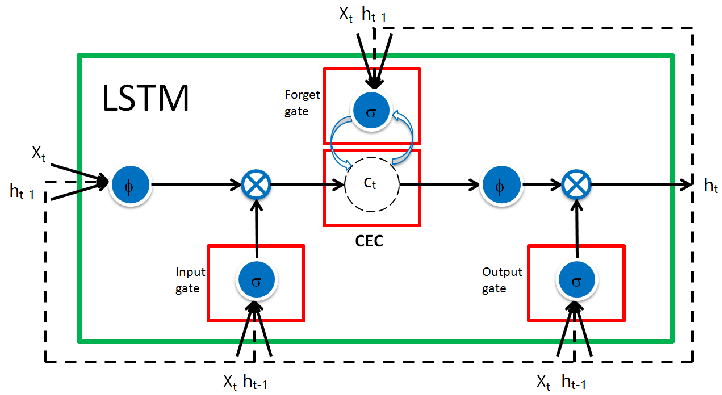

The Long Short-Term Memory is composed of a linear unit surrounded by three logistic gates. The name for these gates vary from place to place, but the most usual names for them are:

* the "Input" or "Write" Gate, which handles the writing of data into the information cell
* the "Output" or "Read" Gate, which handles the sending of data back onto the Recurrent Network
* the "Keep" or "Forget" Gate, which handles the maintaining and modification of the data stored in the information cell

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Built-in RNN layers: a simple example
There are three built-in RNN layers in Keras:

1. keras.layers.SimpleRNN, a fully-connected RNN where the output from previous timestep is to be fed to next timestep.

2. keras.layers.GRU, first proposed in Cho et al., 2014.

3. keras.layers.LSTM, first proposed in Hochreiter & Schmidhuber, 1997.

Here I choose LSTM.

We want to create a network that has only one LSTM cell. We have to pass 2 elements to LSTM, the prv_output and prv_state, so called, h and c. Therefore, we initialize a state vector, state. Here, state is a tuple with 2 elements, each one is of size [1 x 4], one for passing prv_output to next time step, and another for passing the prv_state to next time stamp.

In [2]:
LSTM_CELL_SIZE = 4  # output size (dimension), which is same as hidden size in the cell

state = (tf.zeros([1,LSTM_CELL_SIZE]),)*2
state

2022-06-16 18:06:49.240449: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


(<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0., 0., 0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0., 0., 0., 0.]], dtype=float32)>)

* By default, the output of a RNN layer contains a single vector per sample. This vector is the RNN cell output corresponding to the last timestep, containing information about the entire input sequence. The shape of this output is (batch_size, units) where units corresponds to the units argument passed to the layer's constructor.

In [3]:
lstm = tf.keras.layers.LSTM(LSTM_CELL_SIZE, return_sequences=True, return_state=True)

#A RNN layer can also return the entire sequence of outputs for each sample (one vector per timestep per sample), if you set return_sequences=True. 
#The shape of this output is (batch_size, timesteps, units)

lstm.states=state

print(lstm.states)

(<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0., 0., 0., 0.]], dtype=float32)>, <tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0., 0., 0., 0.]], dtype=float32)>)


In [4]:
#let's define a sample input, batch 
#Batch size x time steps x features.
sample_input = tf.constant([[3,2,2,2,2,2]],dtype=tf.float32)

batch_size = 1
sentence_max_length = 1
n_features = 6

new_shape = (batch_size, sentence_max_length, n_features)

inputs = tf.constant(np.reshape(sample_input, new_shape), dtype = tf.float32)

Now, we can pass the input to lstm_cell, and check the new state:output, final_memory_state, final_carry_state = lstm(inputs)

In [5]:
output, final_memory_state, final_carry_state = lstm(inputs)

In [6]:
print('Output : ', tf.shape(output))

print('Memory : ',tf.shape(final_memory_state))

print('Carry state : ',tf.shape(final_carry_state))

Output :  tf.Tensor([1 1 4], shape=(3,), dtype=int32)
Memory :  tf.Tensor([1 4], shape=(2,), dtype=int32)
Carry state :  tf.Tensor([1 4], shape=(2,), dtype=int32)


The code above is for creating a single LSTM, for cresting no of layers for RNN, we create a stacked LSTM 

In [7]:
cells = []
LSTM_CELL_SIZE_1 = 4 #4 hidden nodes
cell1 = tf.keras.layers.LSTMCell(LSTM_CELL_SIZE_1)
cells.append(cell1)
LSTM_CELL_SIZE_2 = 7 #5 hidden nodes
cell2 = tf.keras.layers.LSTMCell(LSTM_CELL_SIZE_2)
cells.append(cell2)

To create a multi-layer LTSM we use the tf.keras.layers.StackedRNNCells function, it takes in multiple single layer LTSM cells to create a multilayer stacked LTSM model.

In [8]:
stacked_lstm =  tf.keras.layers.StackedRNNCells(cells)
lstm_layer= tf.keras.layers.RNN(stacked_lstm ,return_sequences=True, return_state=True)

Lets say the input sequence length is 3, and the dimensionality of the inputs is 6. The input should be a Tensor of shape: [batch_size, max_time, dimension], in our case it would be (3,2, 6)

In [9]:
#Batch size x time steps x features.
sample_input = [[[1,2,3,4,3,2], [1,2,1,1,1,2],[1,2,2,2,2,2]],[[1,2,3,4,3,2],[3,2,2,1,1,2],[0,0,0,0,3,2]]]
sample_input

batch_size = 2
time_steps = 3
features = 6
new_shape = (batch_size, time_steps, features)

x = tf.constant(np.reshape(sample_input, new_shape), dtype = tf.float32)

In [10]:
output, final_memory_state, final_carry_state  = lstm_layer(x)
print('Output : ', tf.shape(output))

print('Memory : ',tf.shape(final_memory_state))

print('Carry state : ',tf.shape(final_carry_state))

Output :  tf.Tensor([2 3 7], shape=(3,), dtype=int32)
Memory :  tf.Tensor([2 2 4], shape=(3,), dtype=int32)
Carry state :  tf.Tensor([2 2 7], shape=(3,), dtype=int32)
